## 1. 라이브러리 불러오기
머신러닝 학습을 위한 numpy, pandas, matplotlib, sklearn을 불러옵니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

Duplicate key in file WindowsPath('C:/Users/jinhyeongsik/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 815 ('font.family : Noto Sans KR')
Duplicate key in file WindowsPath('C:/Users/jinhyeongsik/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 816 ('font.sans-serif : Noto Sans KR')
Duplicate key in file WindowsPath('C:/Users/jinhyeongsik/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 817 ('axes.unicode_minus : False')


## 2. 시각화 스타일 지정
matplotlib 스타일을 seasborn notebook 테마로 설정

In [2]:
plt.style.available
plt.style.use('seaborn-v0_8-notebook')

## 3. 붓꽃 품종 예측
`iris = load_iris()`  붓꽃 데이터를 생성합니다.

In [3]:
iris = load_iris()

## 4. 붓꽃 모델 데이터프레임 생성

- `iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)`
  - `data=iris.data`: 붓꽃 데이터 사용  
  - `columns=iris.feature_names`: 열 이름을 붓꽃 특성 이름으로 지정
    
* `iris_df['Target'] = iris.target`: 붓꽃 데이터의 정답 정보를 iris_df['Target'] 열에 정답 데이터를 붙여줌

In [4]:
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Target  
0         0  

## 5. 학습용 · 테스트용 데이터 나누기 

In [5]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 6. KNN 모델 적용 

In [6]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

## 7. 예측

In [10]:
y_pred = knn.predict(X_test)

## 8. 정확도 평가

- `accuracy_score`: 정확도 평가 사이킷런 라이브러리

In [74]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

정확도: 0.9666666666666667


## 9. 시각화 

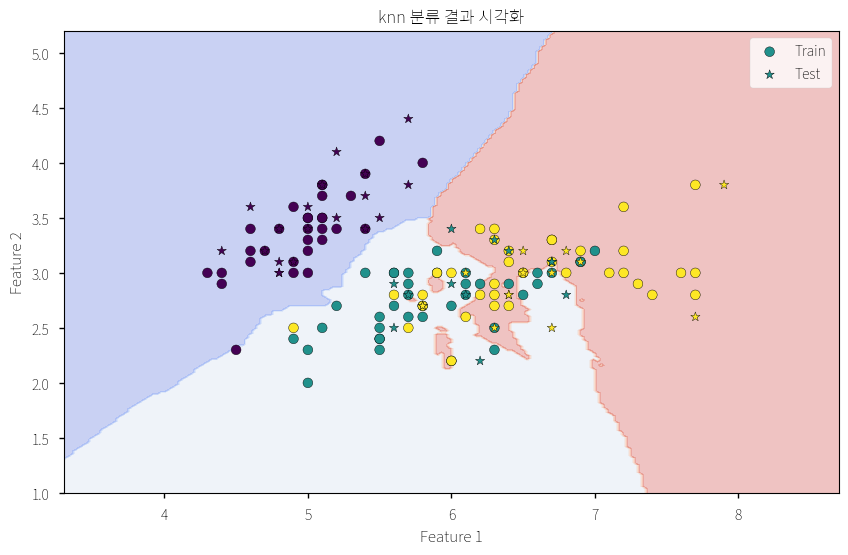

In [79]:
X = iris.data[:, :2]  # 시각화를 위해 특성 2개만 사용
y = iris.target

# 학습용 · 테스트용 데이터 나누기, knn 알고리즘 학습 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 2D meshgrid 만들기
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# 각 좌표에서 예측
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# 학습 데이터 플롯
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', label='Train')
# 테스트 데이터 플롯
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='*', edgecolor='k', label='Test')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('knn 분류 결과 시각화')
plt.legend()
plt.show()